In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py

In [2]:
data=pd.read_csv('South_Asian_dataset.csv')
data.head()

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),Gini index,...,Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population),Research and development expenditure (% of GDP),High-technology exports (% of manufactured exports)
0,Afghanistan,2000,3.521418e+09,NaN,180.188369,7.955,NaN,0.004828,NaN,NaN,...,45,1.852781994,4.787233829,-2.438968897,-2.080252647,-1.780660748,-2.031417131,..,..,..
1,Afghanistan,2001,2.813572e+09,-9.431974,142.903364,7.958,NaN,0.024169,NaN,NaN,...,45.6,1.852781994,..,..,..,..,..,0.00472257,..,..
2,Afghanistan,2002,3.825701e+09,28.600001,182.174038,7.939,NaN,1.306950,NaN,NaN,...,37.8,1.852781994,4.761904716,-2.035033703,-1.81154573,-1.673473239,-1.433421016,0.0045614,..,..
3,Afghanistan,2003,4.520947e+09,8.832278,199.643226,7.922,NaN,1.278493,NaN,NaN,...,36.7,1.852781994,4.761904716,-2.198372364,-1.463107824,-1.5582937,-1.177571177,0.0878913,..,..
4,Afghanistan,2004,5.224897e+09,1.414118,221.830531,7.914,NaN,3.577104,NaN,NaN,...,44.2,1.852781994,6.403940678,-2.295682192,-1.511548996,-1.693925261,-1.203033924,0.105809,..,..


In [3]:
#on remarque que il y'a des colonnes rempliaient par le symbole '--' alors remplacerpar NaN
data.replace('..', np.nan, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 33 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Country                                                                     192 non-null    object 
 1   Year                                                                        192 non-null    int64  
 2   GDP (current US$)                                                           190 non-null    float64
 3   GDP growth (annual %)                                                       189 non-null    float64
 4   GDP per capita (current US$)                                                190 non-null    float64
 5   Unemployment, total (% of total labor force) (modeled ILO estimate)         192 non-null    float64
 6   Inflation, consumer prices (annual %)             

In [5]:
data.isnull().sum()
#23 colonnes avec des vides a combler

Country                                                                         0
Year                                                                            0
GDP (current US$)                                                               2
GDP growth (annual %)                                                           3
GDP per capita (current US$)                                                    2
Unemployment, total (% of total labor force) (modeled ILO estimate)             0
Inflation, consumer prices (annual %)                                           9
Foreign direct investment, net inflows (% of GDP)                               5
Trade (% of GDP)                                                               51
Gini index                                                                    150
Population, total                                                               0
Population growth (annual %)                                                    0
Poverty headcoun

In [6]:
# Supprimer la colonne 'Gini index' car elle contient plusieurs valeurs manquantes ; remplir avec la moyenne ou la médiane peut biaiser les données
data.drop(columns=['Gini index'], inplace=True)
data.drop(columns=['High-technology exports (% of manufactured exports)','Research and development expenditure (% of GDP)','Literacy rate, adult total (% of people ages 15 and above)','Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'],inplace=True)

In [7]:
doublons = data[data.duplicated()]
print(doublons)
#assurer qu'il n'y a pas de doublons

Empty DataFrame
Columns: [Country, Year, GDP (current US$), GDP growth (annual %), GDP per capita (current US$), Unemployment, total (% of total labor force) (modeled ILO estimate), Inflation, consumer prices (annual %), Foreign direct investment, net inflows (% of GDP), Trade (% of GDP), Population, total, Population growth (annual %), Life expectancy at birth, total (years), Mortality rate, infant (per 1,000 live births), School enrollment, primary (% gross), Urban population (% of total population), Access to electricity (% of population), People using at least basic drinking water services (% of population), People using at least basic sanitation services (% of population), Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita), PM2.5 air pollution, mean annual exposure (micrograms per cubic meter), Renewable energy consumption (% of total final energy consumption), Forest area (% of land area), Control of Corruption: Percentile Rank, Political Stability and Abs

In [8]:
# Sélectionner toutes les colonnes de type 'object', sauf 'country'
colonnes_a_convertir = data.select_dtypes('object').columns.difference(['Country'])

# Convertir les colonnes sélectionnées en float
data[colonnes_a_convertir] = data[colonnes_a_convertir].apply(pd.to_numeric, errors='coerce')


In [9]:
data.describe()

,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),"Population, total",Population growth (annual %),...,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population)
count,192.000000,1.900000e+02,189.000000,190.000000,192.000000,183.000000,187.000000,141.000000,1.920000e+02,192.000000,...,184.000000,168.000000,179.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,173.000000
mean,2011.500000,2.910099e+11,5.065082,2161.422299,6.287391,6.623532,1.913846,49.525213,2.110938e+08,1.691994,...,1.091878,46.245076,47.202793,24.149707,33.954310,-0.960264,-0.633873,-0.483059,-0.506034,17.503976
std,6.940284,6.701374e+11,6.265406,2465.328490,3.204121,5.606191,2.959802,21.645193,4.053449e+08,1.130467,...,1.064332,19.818578,27.700938,22.130777,23.564439,1.154907,0.478759,0.642758,0.521447,21.026589
min,2000.000000,4.607334e+08,-32.908829,142.903364,0.398000,-6.811161,-0.638806,21.459969,2.825070e+05,-0.651321,...,0.039875,10.808561,1.200000,1.852782,0.473934,-2.810035,-2.080253,-1.922500,-2.031417,0.004561
25%,2005.750000,5.291861e+09,3.525153,632.294526,4.045750,3.747312,0.434715,32.514632,1.427913e+07,0.999985,...,0.344144,26.689906,31.050000,4.268094,17.500000,-1.841675,-0.908290,-0.843231,-0.879868,2.436910
50%,2011.500000,3.066091e+10,5.456388,1250.093340,5.839000,5.702070,0.879517,44.642411,2.742371e+07,1.368307,...,0.770182,52.576154,45.900000,18.742979,30.238095,-1.078778,-0.641796,-0.531281,-0.500677,8.260000
75%,2017.250000,1.931948e+11,7.123428,2689.319415,8.384250,8.356711,1.695962,55.710589,1.670127e+08,2.163591,...,1.475858,62.023257,68.650000,35.991531,44.790941,-0.158176,-0.374301,0.020161,-0.123003,24.800000
max,2023.000000,3.549920e+12,37.687192,12667.435670,14.386000,49.721102,16.783473,108.157795,1.428628e+09,7.541019,...,5.323969,79.037396,92.000000,71.501311,93.333336,1.284487,0.987187,0.672035,0.462193,86.840300


In [10]:
# Remplacer les valeurs manquantes par la moyenne par pays
colonnes_a_remplir = [
    'GDP (current US$)', 'GDP growth (annual %)', 'Life expectancy at birth, total (years)',
    'Mortality rate, infant (per 1,000 live births)', 'School enrollment, primary (% gross)',
    'Access to electricity (% of population)', 'People using at least basic sanitation services (% of population)',
    'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
    'People using at least basic drinking water services (% of population)',
    'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
    'Renewable energy consumption (% of total final energy consumption)', 'Forest area (% of land area)',
    'Control of Corruption: Percentile Rank', 'Political Stability and Absence of Violence/Terrorism: Estimate',
    'Regulatory Quality: Estimate', 'Rule of Law: Estimate', 'Voice and Accountability: Estimate',
    'Individuals using the Internet (% of population)'
]

# Remplir les NaN dans chaque colonne spécifiée par la moyenne de chaque pays
for col in colonnes_a_remplir:
    data[col] = data.groupby('Country')[col].transform(lambda x: x.fillna(x.mean()))

# Remplacer les valeurs manquantes par le PIB / POPULATION
data['GDP per capita (current US$)'].fillna(data['GDP (current US$)'] / data['Population, total'], inplace=True)

# Remplacer les valeurs manquantes par la moyenne
data['Foreign direct investment, net inflows (% of GDP)'].fillna(data['Foreign direct investment, net inflows (% of GDP)'].mean(), inplace=True)

#Utiliser l’imputation KNN (K-Nearest Neighbors), qui remplace les valeurs manquantes par la moyenne des K observations les plus similaires
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data[['Inflation, consumer prices (annual %)', 'Trade (% of GDP)']] = imputer.fit_transform(data[['Inflation, consumer prices (annual %)', 'Trade (% of GDP)']])




In [11]:
data.isnull().sum()
#Pas de valeur manquante

Country                                                                       0
Year                                                                          0
GDP (current US$)                                                             0
GDP growth (annual %)                                                         0
GDP per capita (current US$)                                                  0
Unemployment, total (% of total labor force) (modeled ILO estimate)           0
Inflation, consumer prices (annual %)                                         0
Foreign direct investment, net inflows (% of GDP)                             0
Trade (% of GDP)                                                              0
Population, total                                                             0
Population growth (annual %)                                                  0
Life expectancy at birth, total (years)                                       0
Mortality rate, infant (per 1,000 live b

# DATA ANALYSIS

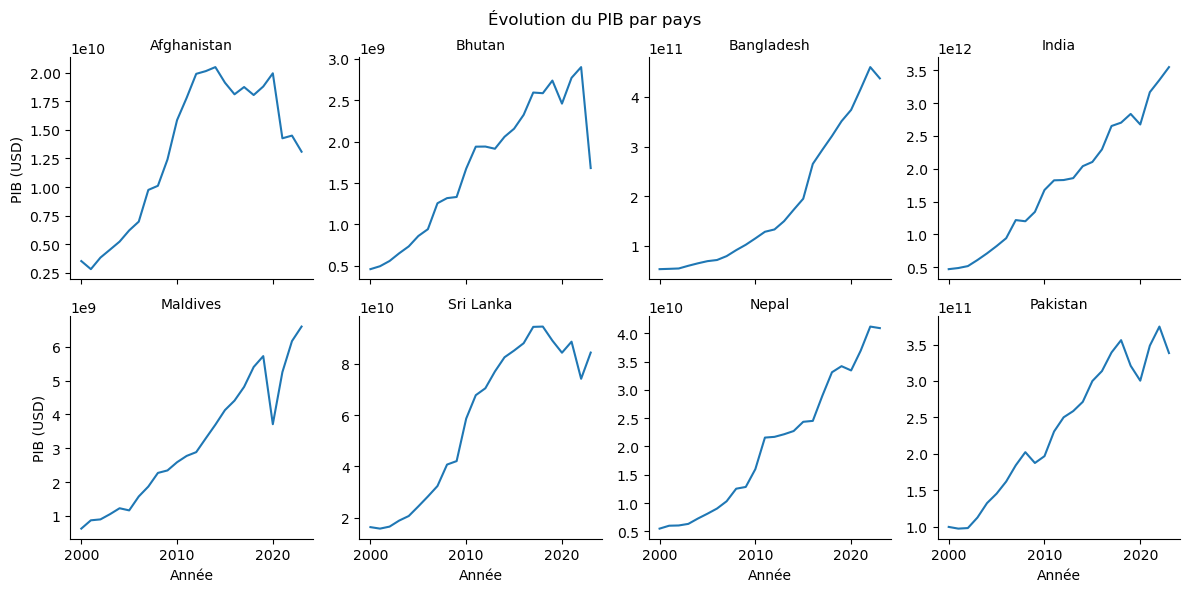

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour les pays désirés
pays_selectionnes = data['Country'].unique() 
data_filtre = data[data['Country'].isin(pays_selectionnes)]

# Créer une grille de graphiques par pays
g = sns.FacetGrid(data_filtre, col='Country', col_wrap=4, height=3, sharey=False)
g.map(sns.lineplot, 'Year', 'GDP (current US$)')
g.set_titles("{col_name}")
g.set_axis_labels("Année", "PIB (USD)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Évolution du PIB par pays")
plt.show()


Afghanistan :
Une croissance significative jusqu'en 2013-2014, suivie d'une stagnation, puis d'une baisse après 2015.

Bhutan :
Une progression régulière, avec un ralentissement ou une baisse visible autour de 2020.

Bangladesh :
Une croissance impressionnante et régulière, témoignant d'une économie en plein essor.

India :
Une croissance rapide et soutenue, faisant d'elle l'une des plus grandes économies de la région.

Maldives :
Une croissance marquée par une forte fluctuation autour de 2020, notamment en raison de l'impact de la pandémie sur le secteur du tourisme.

Sri Lanka :
Une augmentation régulière, mais avec des fluctuations notables après 2018.

Nepal :
Une croissance soutenue, accompagnée de fluctuations mineures.

Pakistan :
Une croissance soutenue jusqu'en 2018, suivie d'un ralentissement ou d'une baisse récente.




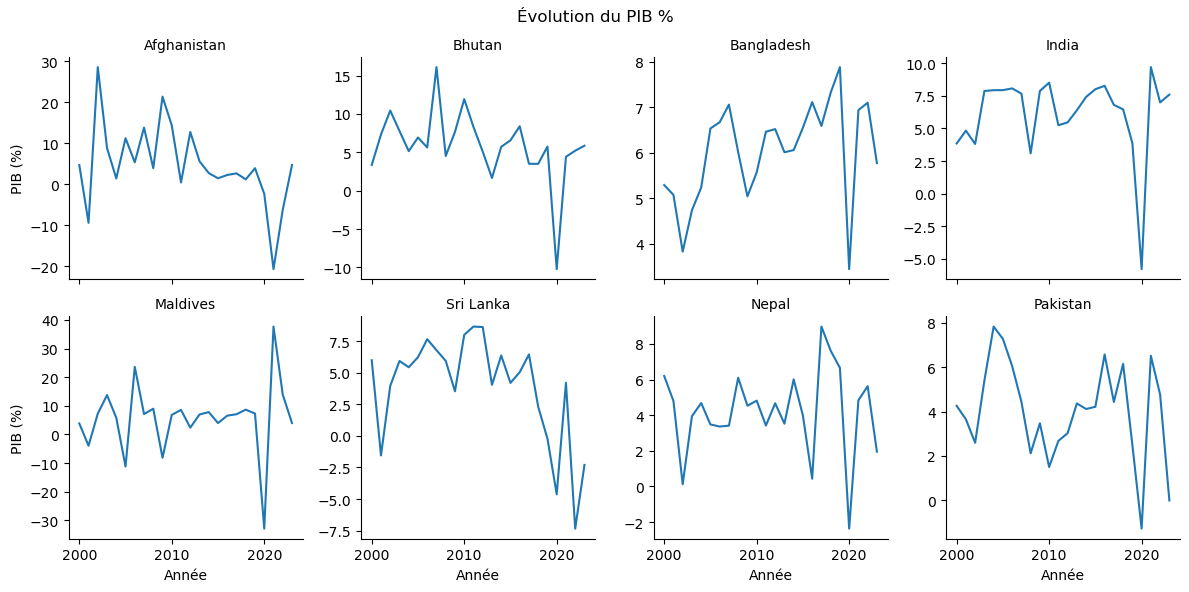

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour les pays désirés
pays_selectionnes = data['Country'].unique()  # ou sélectionnez une liste spécifique de pays
data_filtre = data[data['Country'].isin(pays_selectionnes)]

# Créer une grille de graphiques par pays
g = sns.FacetGrid(data_filtre, col='Country', col_wrap=4, height=3, sharey=False)
g.map(sns.lineplot, 'Year', 'GDP growth (annual %)')
g.set_titles("{col_name}")
g.set_axis_labels("Année", "PIB (%)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Évolution du PIB %")
plt.show()


Tous les pays ont connu des périodes de fluctuations dans leur pourcentage de croissance économique annuelle, avec une chute libre notable en 2019/2020 en raison de la pandémie de COVID-19.
Ces graphiques montrent clairement que 2020 a été une année de récession pour tous les pays à cause de la pandémie.


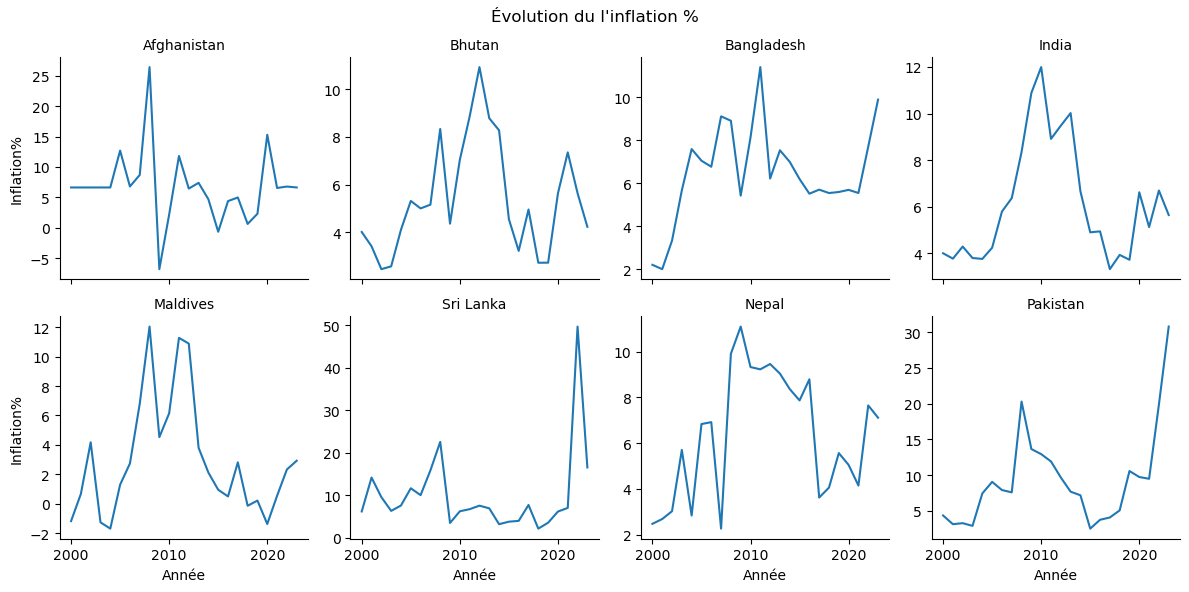

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour les pays désirés
pays_selectionnes = data['Country'].unique()  # ou sélectionnez une liste spécifique de pays
data_filtre = data[data['Country'].isin(pays_selectionnes)]

# Créer une grille de graphiques par pays
g = sns.FacetGrid(data_filtre, col='Country', col_wrap=4, height=3, sharey=False)
g.map(sns.lineplot, 'Year', 'Inflation, consumer prices (annual %)')
g.set_titles("{col_name}")
g.set_axis_labels("Année", "Inflation%")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Évolution du l'inflation %")
plt.show()


Sri Lanka et Pakistan sont les plus volatils, avec des pics extrêmes. Cela reflète probablement une instabilité économique ou des événements spécifiques.
Les pays comme le Bhutan, le Bangladesh, et le Nepal montrent des niveaux d'inflation plus stables, ce qui indique une meilleure gestion des politiques économiques.
India a connu une baisse progressive de l'inflation après des pics élevés au début des années 2010.


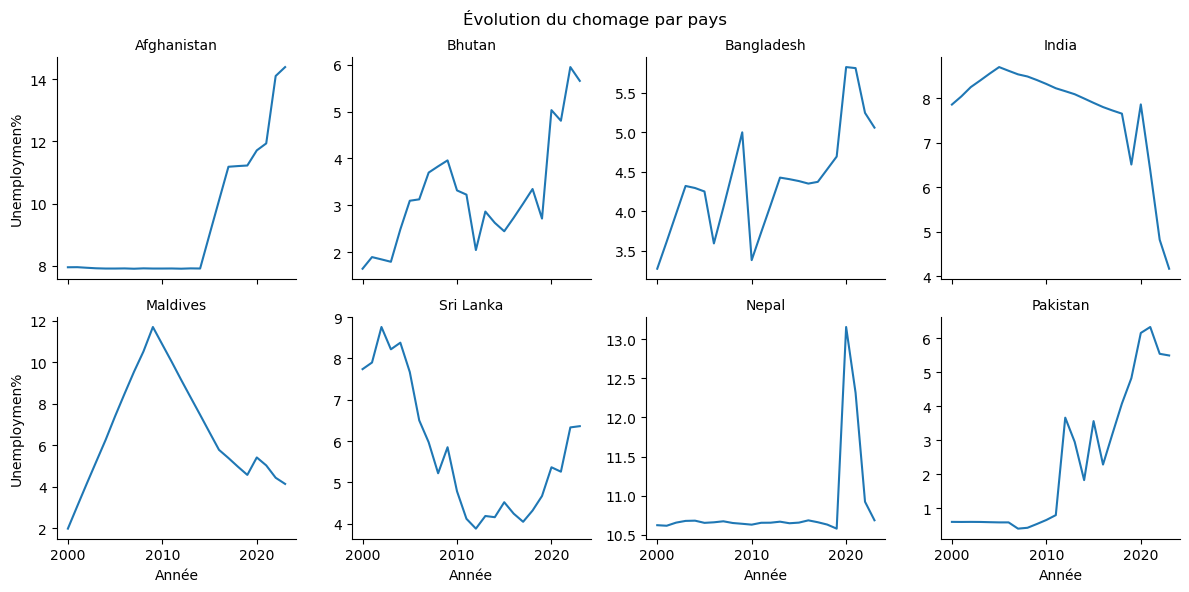

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour les pays désirés
pays_selectionnes = data['Country'].unique()  # ou sélectionnez une liste spécifique de pays
data_filtre = data[data['Country'].isin(pays_selectionnes)]

# Créer une grille de graphiques par pays
g = sns.FacetGrid(data_filtre, col='Country', col_wrap=4, height=3, sharey=False)
g.map(sns.lineplot, 'Year', 'Unemployment, total (% of total labor force) (modeled ILO estimate)')
g.set_titles("{col_name}")
g.set_axis_labels("Année", "Unemploymen%")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Évolution du chomage par pays")
plt.show()


1-Certains pays (comme l'Afghanistan et le Népal) montrent des pics très abrupts, ce qui pourrait correspondre à des crises économiques ou des événements politiques.

2-Les Maldives, bien que connaissant des fluctuations importantes, montrent une tendance générale à la baisse.

3-L'Inde est le seul pays à montrer une baisse continue et significative du chômage sur toute la période.

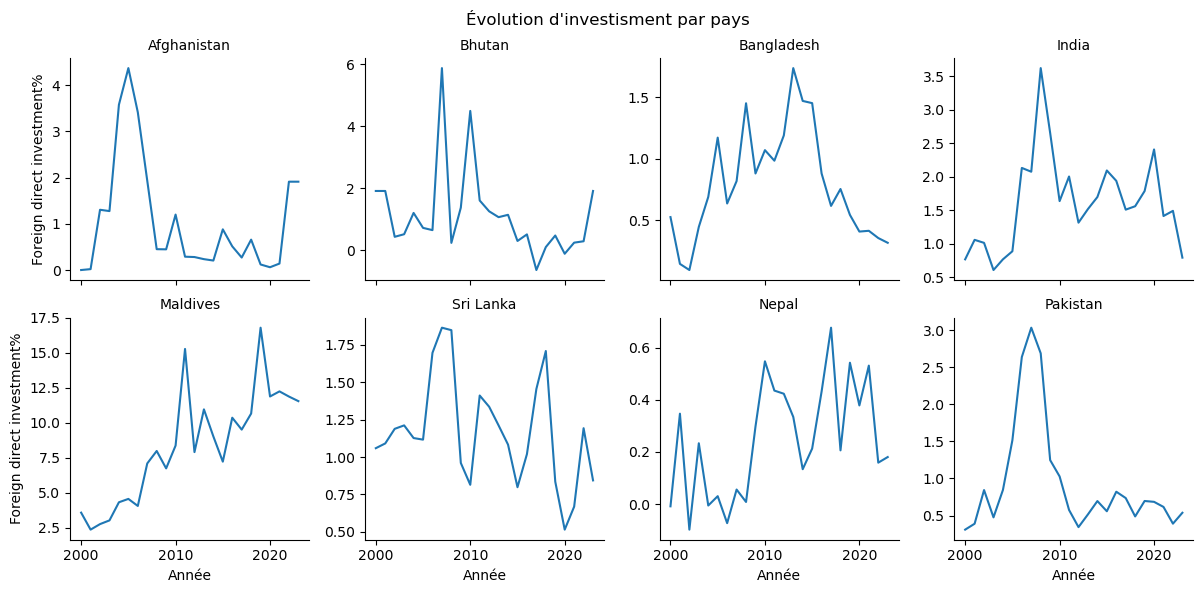

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour les pays désirés
pays_selectionnes = data['Country'].unique()  # ou sélectionnez une liste spécifique de pays
data_filtre = data[data['Country'].isin(pays_selectionnes)]

# Créer une grille de graphiques par pays
g = sns.FacetGrid(data_filtre, col='Country', col_wrap=4, height=3, sharey=False)
g.map(sns.lineplot, 'Year', 'Foreign direct investment, net inflows (% of GDP)')
g.set_titles("{col_name}")
g.set_axis_labels("Année", "Foreign direct investment%")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Évolution d'investisment par pays")
plt.show()


1-Les Maldives affichent la plus forte croissance des IDE, montrant une attractivité accrue pour les investisseurs étrangers.

2-Les pays comme le Pakistan et l'Afghanistan subissent des variations brutales avec des baisses rapides après des hausses initiales.

3-Le Népal a constamment les plus faibles IDE, ce qui pourrait refléter des défis économiques ou politiques limitant l'attraction des investissements étrangers.

4-Le Bhoutan et le Bangladesh montrent des cycles avec des pics élevés, mais une réduction notable vers la fin de la période.

5-L'Inde montre des IDE relativement stables mais décroissants après un pic(apres 2010)

<Figure size 2000x2500 with 0 Axes>

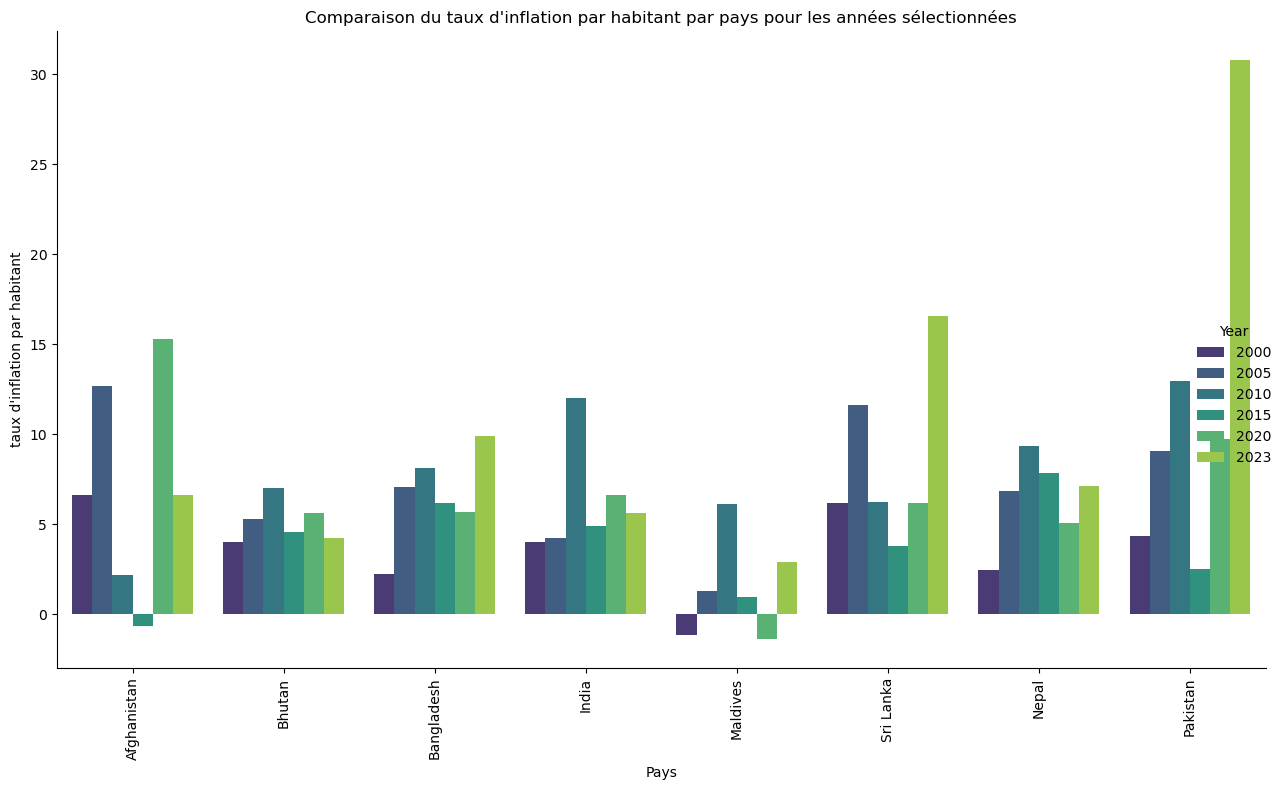

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les données pour les années spécifiques
years_to_plot = [2000, 2005, 2010, 2015, 2020, 2023]
year_data = data[data['Year'].isin(years_to_plot)]

# Configurer la taille de la figure
plt.figure(figsize=(20, 25))

# Tracer un graphique en barres pour chaque année avec une palette pastel
sns.catplot(
    data=year_data,
    x='Country', y='Inflation, consumer prices (annual %)', 
    hue='Year', kind='bar', palette='viridis', height=8, aspect=1.5
)

# Ajouter des titres et rotations
plt.title("Comparaison du taux d'inflation par habitant par pays pour les années sélectionnées")
plt.xlabel("Pays")
plt.ylabel("taux d'inflation par habitant")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Pakistan et Sri Lanka : Ces deux pays présentent d'importantes fluctuations sur toute la période (2000-2020), avec une augmentation marquée culminant à un pic très élevé en 2023.

Bhoutan, Bangladesh et Népal : Ces pays affichent de faibles variations dans leurs taux d'inflation par habitant. La situation reste relativement stable, avec un taux qui ne dépasse pas 10 % sur l'ensemble de la période.

Afghanistan et Inde : Bien qu'ils montrent des fluctuations significatives tout au long de la période, ces pays connaissent une baisse notable de leur taux d'inflation en 2023.

Maldives : Ce pays se distingue par un taux d'inflation généralement très faible, qui reste en dessous de 5 % sur toute la période analysée.

<Figure size 1400x1000 with 0 Axes>

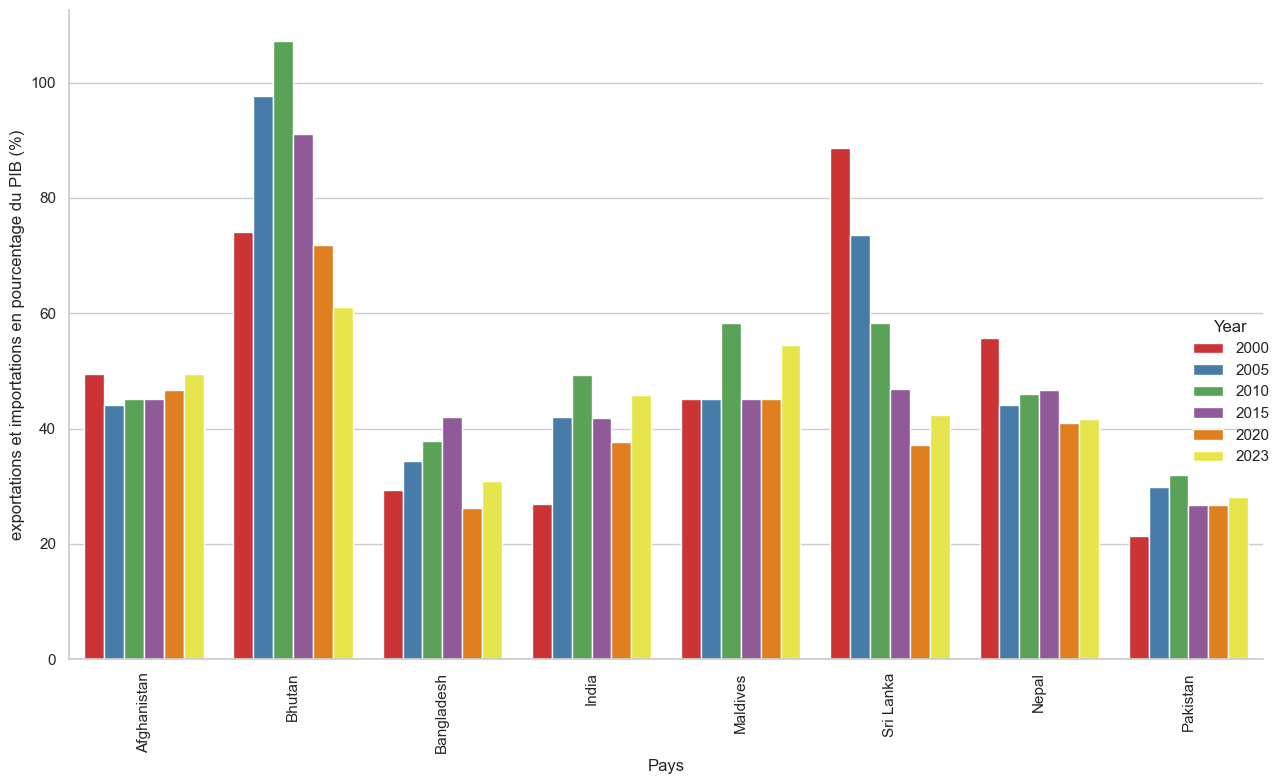

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Appliquer un style graphique moderne
sns.set_theme(style="whitegrid")

# Filtrer les données pour les années spécifiques
years_to_plot = [2000, 2005, 2010, 2015, 2020, 2023]
year_data = data[data['Year'].isin(years_to_plot)]

# Configurer la taille de la figure
plt.figure(figsize=(14, 10))

# Tracer le graphique avec une palette de couleurs et un espacement ajusté
bar_plot = sns.catplot(
    data=year_data,
    x='Country', y='Trade (% of GDP)',
    hue='Year', kind='bar', palette='Set1', height=8, aspect=1.5
)

# Personnaliser le titre et les étiquettes
bar_plot.set_titles("exportations et importations en pourcentage du PIB par pays pour les années sélectionnées")
bar_plot.set_axis_labels("Pays", "exportations et importations en pourcentage du PIB (%)")
plt.xticks(rotation=90)

# Ajuster les légendes et espacement
plt.tight_layout()

# Afficher le graphique
plt.show()


<Figure size 1400x1000 with 0 Axes>

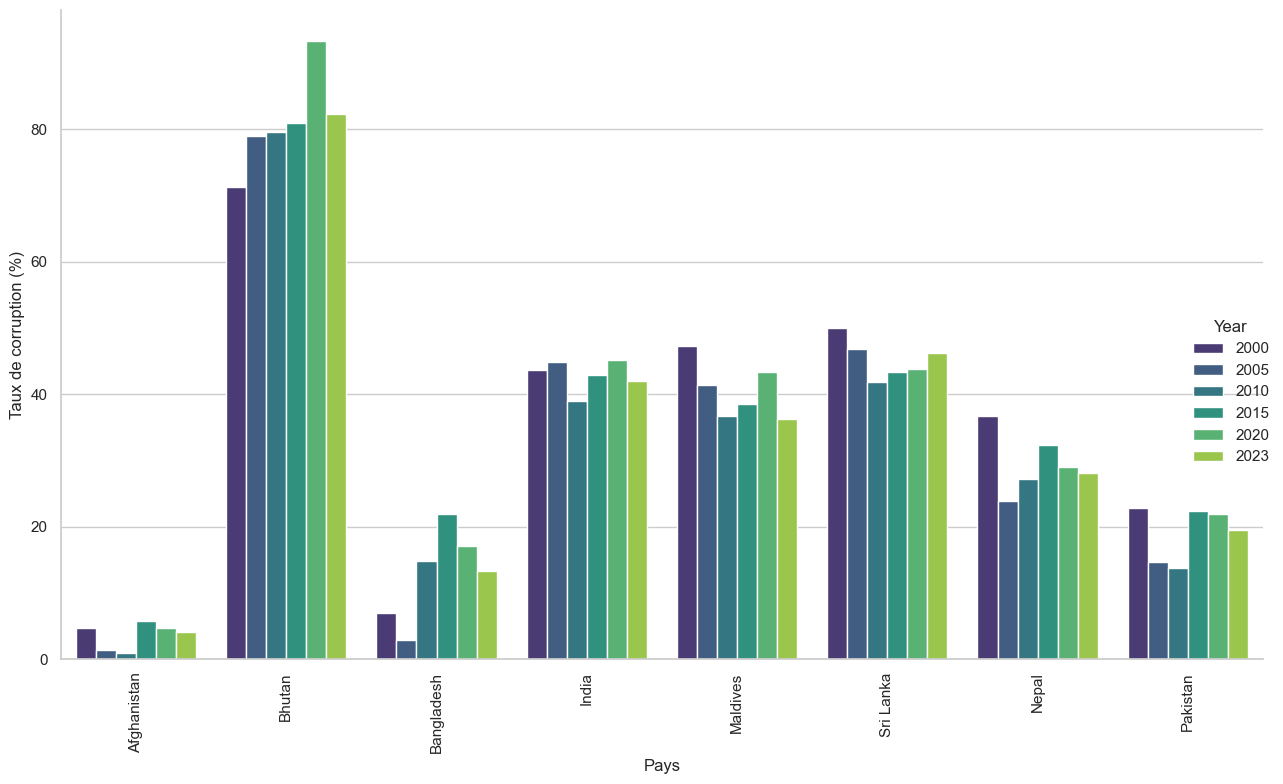

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Appliquer un style graphique moderne
sns.set_theme(style="whitegrid")

# Filtrer les données pour les années spécifiques
years_to_plot = [2000, 2005, 2010, 2015, 2020, 2023]
year_data = data[data['Year'].isin(years_to_plot)]

# Configurer la taille de la figure
plt.figure(figsize=(14, 10))

# Tracer le graphique avec une palette de couleurs et un espacement ajusté
bar_plot = sns.catplot(
    data=year_data,
    x='Country', y='Control of Corruption: Percentile Rank',
    hue='Year', kind='bar', palette='viridis', height=8, aspect=1.5
)

# Personnaliser le titre et les étiquettes
bar_plot.set_titles("Comparaison du corruption par pays pour les années sélectionnées")
bar_plot.set_axis_labels("Pays", "Taux de corruption (%)")
plt.xticks(rotation=90)

# Ajuster les légendes et espacement
plt.tight_layout()

# Afficher le graphique
plt.show()


Bhoutan :
Le Bhoutan se distingue avec le taux de corruption le plus élevé parmi tous les pays représentés, atteignant même 100 % en 2020.
Sur toute la période, le Bhoutan maintient un niveau de corruption particulièrement élevé.

Inde, Maldives et Sri Lanka :
Ces trois pays présentent des niveaux de corruption modérés, avec des pourcentages ne dépassant jamais 50 %.
De plus, la corruption dans ces pays reste relativement stable au fil du temps.

Népal et Pakistan :
Ces deux pays montrent un faible niveau de corruption, qui ne dépasse pas 35 % sur toute la période étudiée.
Cette situation reflète des efforts potentiels ou des conditions favorables pour limiter la corruption dans ces pays.

Bangladesh et Afghanistan :
Bangladesh présente un taux de corruption très faible sur toutes les périodes, ce qui est notable.
Afghanistan, en revanche, se démarque avec une corruption presque inexistante.

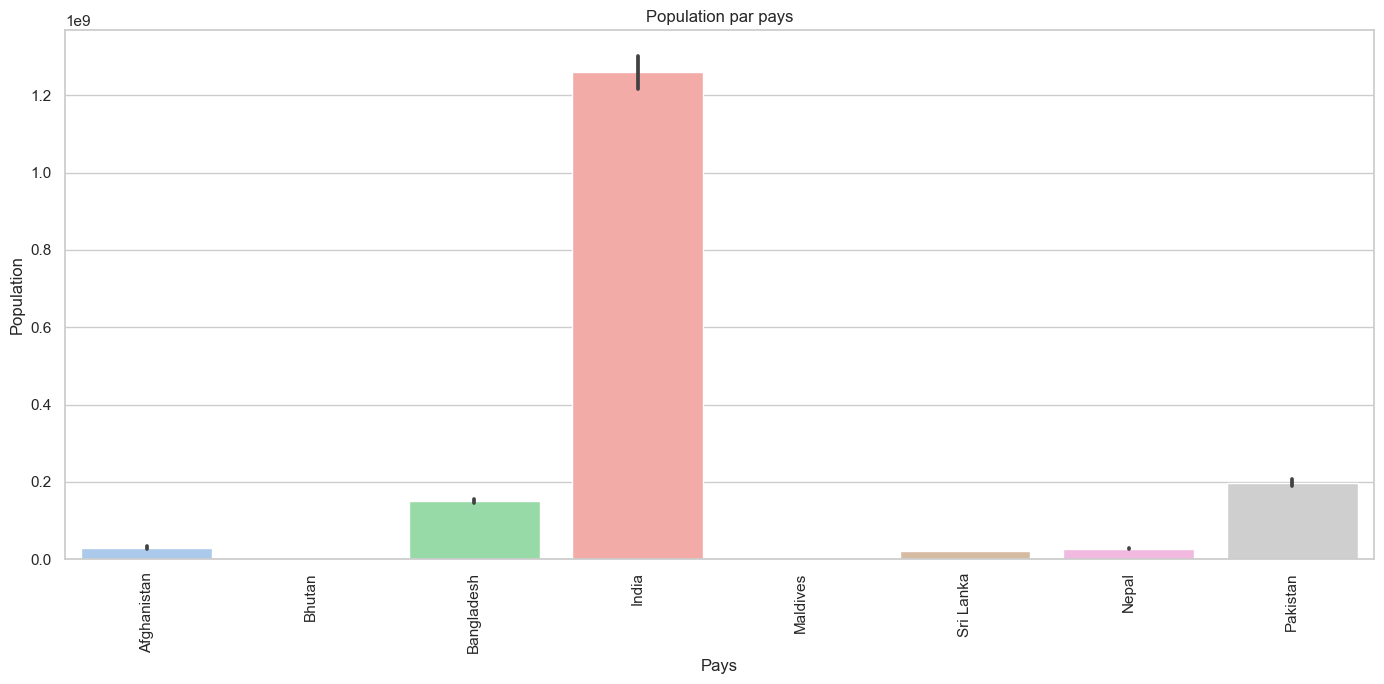

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer l'histogramme pour la population par pays
plt.figure(figsize=(14, 7))

# Tracer l'histogramme avec seaborn ou matplotlib
sns.barplot(x='Country', y='Population, total', data=data, palette='pastel')

# Ajouter des titres et labels
plt.title("Population par pays")
plt.xlabel("Pays")
plt.ylabel("Population")
plt.xticks(rotation=90)  # Rotation des noms des pays pour une meilleure lisibilité

# Afficher le graphique
plt.tight_layout()
plt.show()


L'Inde est de loin le pays le plus peuplé, avec une population qui dépasse largement 1,2 milliard d'habitants.
Les autres pays, comme les Maldives ou le Bhoutan, ont des populations nettement plus petites.

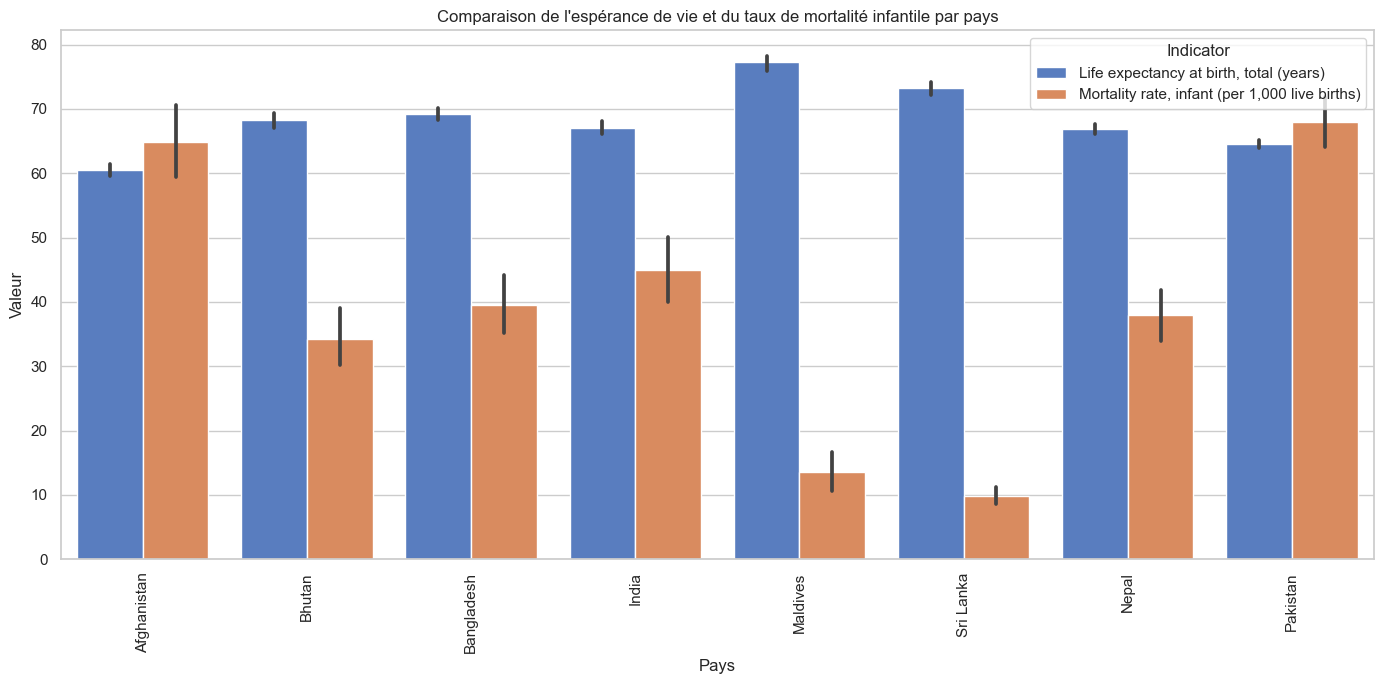

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les données pour éviter les valeurs manquantes
data_filtered = data[['Country', 'Life expectancy at birth, total (years)', 'Mortality rate, infant (per 1,000 live births)']].dropna()

# Reshaper les données pour faciliter le tracé
data_melted = data_filtered.melt(id_vars=['Country'], 
                                 value_vars=['Life expectancy at birth, total (years)', 'Mortality rate, infant (per 1,000 live births)'], 
                                 var_name='Indicator', value_name='Value')

# Créer un graphique en barres groupées
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Value', hue='Indicator', data=data_melted, palette='muted')

# Ajouter des titres et des labels
plt.title("Comparaison de l'espérance de vie et du taux de mortalité infantile par pays")
plt.xlabel("Pays")
plt.ylabel("Valeur")
plt.xticks(rotation=90)

# Afficher le graphique
plt.tight_layout()
plt.show()


Afghanistan :
Espérance de vie faible (environ 60 ans)./Taux de mortalité infantile élevé (environ 70/1 000).

Bhoutan :
Espérance de vie modérée (environ 70 ans)./Taux de mortalité infantile relativement bas (environ 30/1 000).

Bangladesh :
Espérance de vie similaire au Bhoutan (autour de 70 ans)./Mortalité infantile légèrement inférieure à celle du Bhoutan.

Inde :
Espérance de vie autour de 70 ans./Taux de mortalité infantile autour de 30/1 000.

Maldives :
Meilleures performances :
Espérance de vie élevée (environ 75 ans)./Taux de mortalité infantile très bas (autour de 5/1 000).

Sri Lanka :
Espérance de vie très élevée (environ 75 ans)./Taux de mortalité infantile bas (autour de 10/1 000).

Népal :
Espérance de vie autour de 65 ans./ Taux de mortalité infantile modéré (environ 35/1 000).

Pakistan :
Espérance de vie similaire à celle de l'Afghanistan (environ 60 ans)./Taux de mortalité infantile élevé (près de 70/1 000).

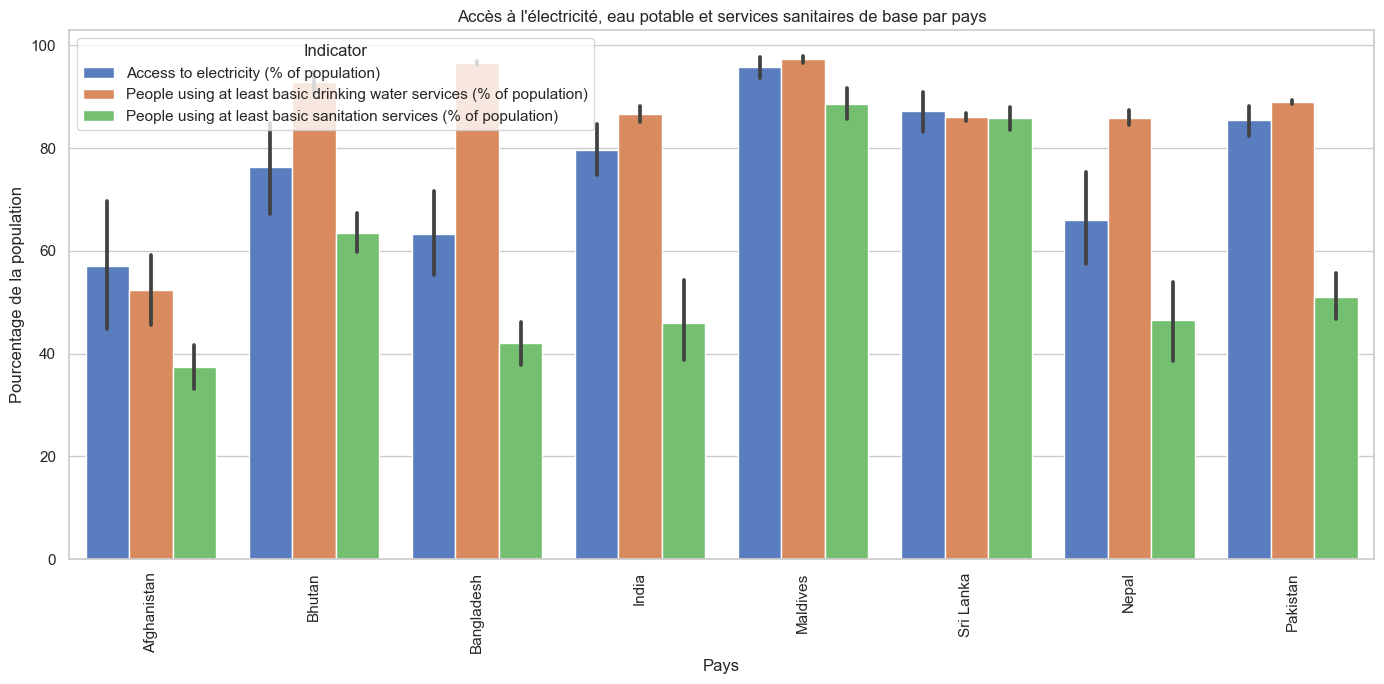

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les données pour les colonnes d'intérêt et éviter les valeurs manquantes
data_filtered = data[['Country', 'Access to electricity (% of population)', 
                      'People using at least basic drinking water services (% of population)', 
                      'People using at least basic sanitation services (% of population)']].dropna()

# Reshaper les données pour faciliter le tracé
data_melted = data_filtered.melt(id_vars=['Country'], 
                                 value_vars=['Access to electricity (% of population)', 
                                             'People using at least basic drinking water services (% of population)', 
                                             'People using at least basic sanitation services (% of population)'], 
                                 var_name='Indicator', value_name='Value')

# Créer un graphique en barres groupées
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Value', hue='Indicator', data=data_melted, palette='muted')

# Ajouter des titres et des labels
plt.title("Accès à l'électricité, eau potable et services sanitaires de base par pays")
plt.xlabel("Pays")
plt.ylabel("Pourcentage de la population")
plt.xticks(rotation=90)  # Rotation des étiquettes des pays pour une meilleure lisibilité

# Afficher le graphique
plt.tight_layout()
plt.show()


Électricité :
Les pays comme les Maldives, le Bhoutan et le Sri Lanka ont des taux d'accès élevés.
L'Afghanistan, le Népal et le Bangladesh présentent des lacunes significatives.

Eau potable :
L'accès est généralement meilleur que pour les autres services, particulièrement élevé dans des pays comme les Maldives, le Sri Lanka et le Bhoutan.

Assainissement :
Cet indicateur est le moins performant dans la plupart des pays, notamment en Afghanistan, au Bangladesh, et au Pakistan.
Les Maldives et le Bhoutan sont des exceptions avec des taux élevés.

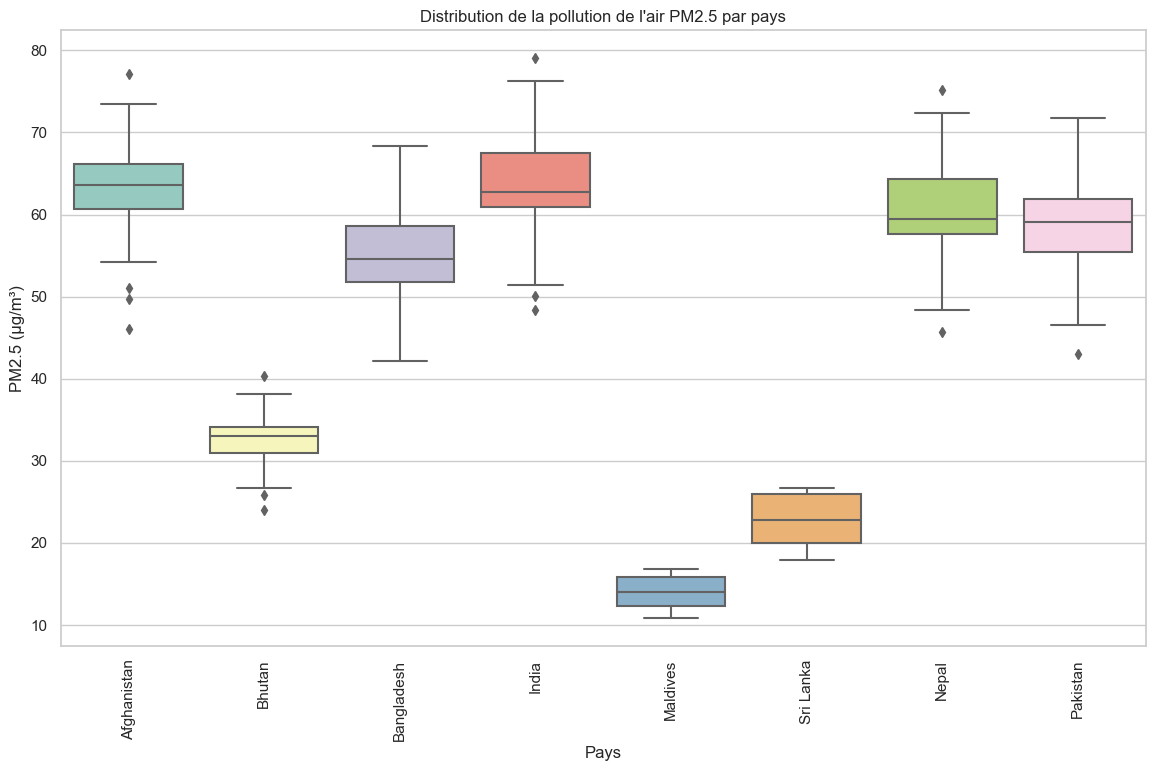

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Country', y='PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', palette='Set3')
plt.title("Distribution de la pollution de l'air PM2.5 par pays")
plt.xlabel("Pays")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=90)
plt.show()


Pays les plus pollués (PM2.5 élevé) :

Inde : Montre la plus haute médiane de pollution PM2.5 avec une distribution très concentrée entre 60 et 80 µg/m³.
Bangladesh et Pakistan et afghanistan et nepal: Présentent également des concentrations élevées, bien que légèrement inférieures à l'Inde.
    
Pays les moins pollués :

Maldives : La médiane est proche de 10 µg/m³, ce qui en fait le pays le moins pollué dans cet ensemble.
Bhoutan et Sri Lanka : Affichent des niveaux de pollution modérés, nettement inférieurs aux pays les plus touchés comme l'Inde ou le Pakistan.
    


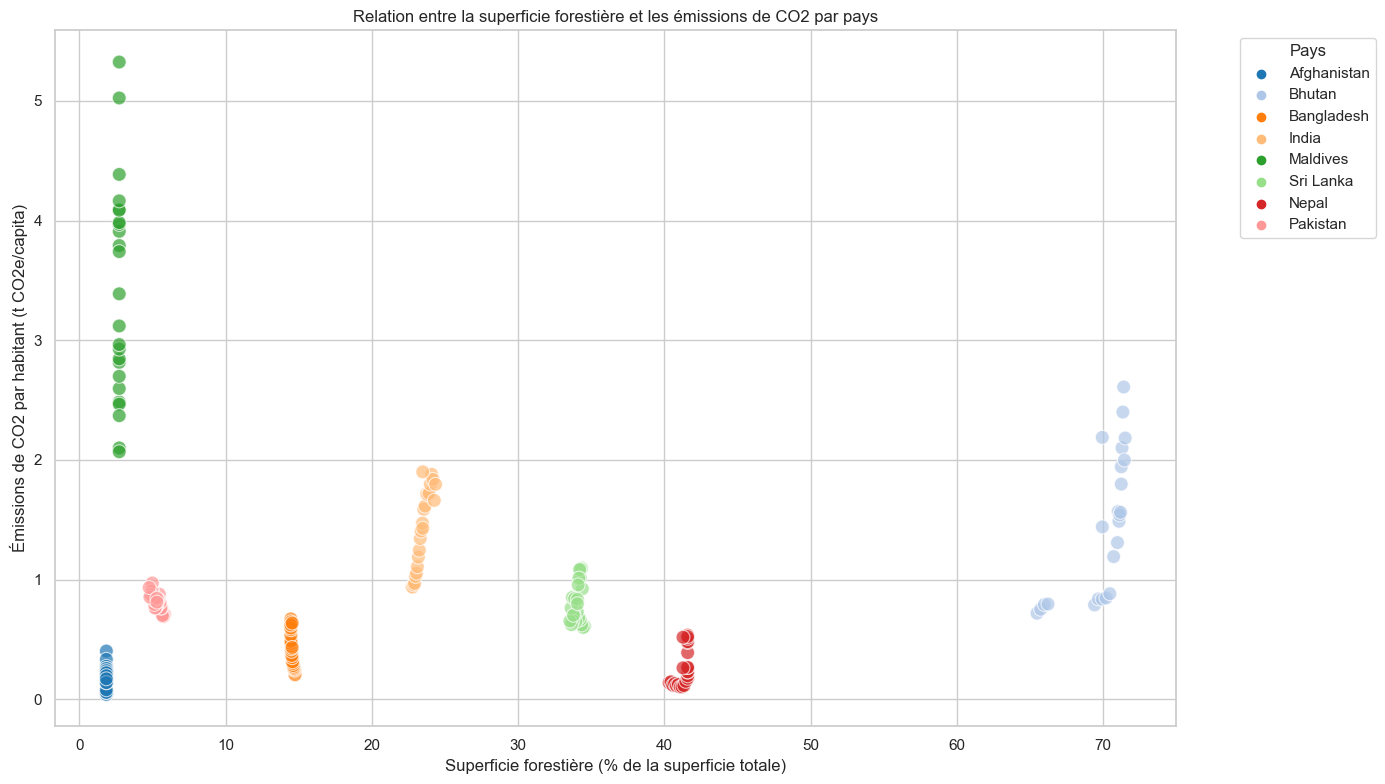

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les données pour les colonnes d'intérêt et éviter les valeurs manquantes
data_filtered = data[['Country', 'Forest area (% of land area)', 
                      'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)']].dropna()

# Créer un graphique de dispersion pour la superficie forestière par rapport aux émissions de CO2
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data_filtered, 
                x='Forest area (% of land area)', 
                y='Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)', 
                hue='Country', palette='tab20', s=100, alpha=0.7)

# Ajouter des titres et des labels
plt.title("Relation entre la superficie forestière et les émissions de CO2 par pays")
plt.xlabel("Superficie forestière (% de la superficie totale)")
plt.ylabel("Émissions de CO2 par habitant (t CO2e/capita)")

# Afficher la légende et ajuster l'affichage pour éviter le chevauchement des pays
plt.legend(title="Pays", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Afficher le graphique
plt.show()


Pays avec une faible couverture forestière (0-10 %) :Afghanistan, Bangladesh, Maldives, et Pakistan 

Ces pays montrent des émissions de CO2 relativement faibles (moins de 1 tCO2/habitant) malgré leur faible couverture forestière.
Exception : Maldives, où les émissions dépassent parfois 1 tCO2/habitant. 

Pays avec une couverture forestière modérée (10-50 %) :Sri Lanka, Bhoutan, et Népal 

Ces pays ont des émissions de CO2 par habitant globalement faibles.

Pays avec une couverture forestière élevée (50-70 %) :Inde 
Une couverture forestière significative n’empêche pas des émissions élevées de CO2 par habitant (1 à 5 tCO2/habitant).


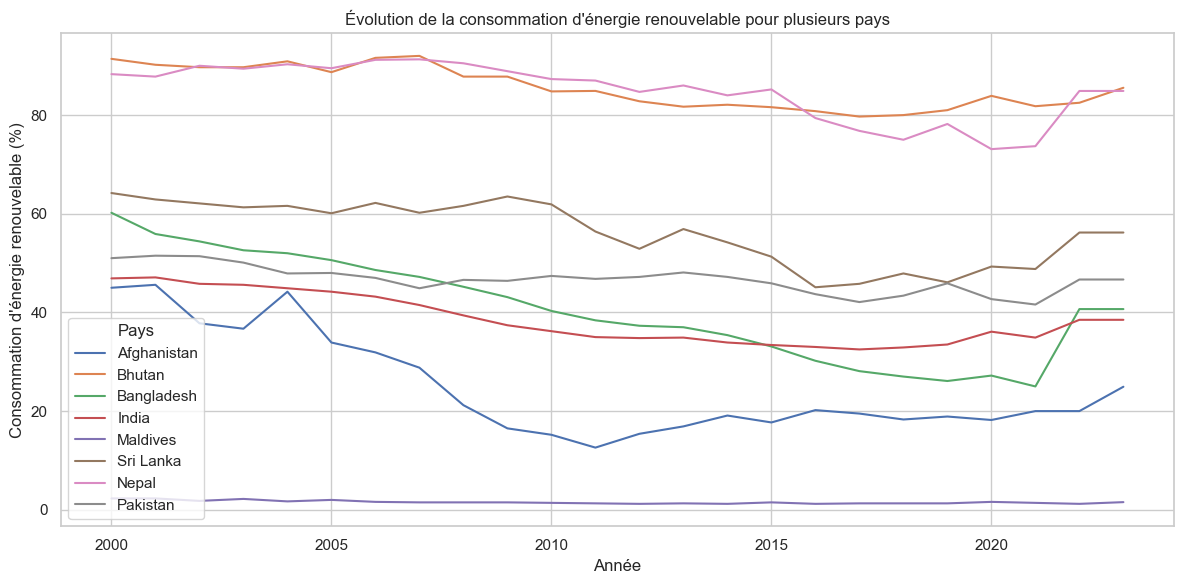

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les données pour les pays désirés
pays_selectionnes = data['Country'].unique()  # ou sélectionnez une liste spécifique de pays
data_filtre = data[data['Country'].isin(pays_selectionnes)]

# Tracer l'évolution de la consommation d'énergie renouvelable pour les 8 pays
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_filtre, x='Year', y='Renewable energy consumption (% of total final energy consumption)', hue='Country')

# Ajouter des titres et labels
plt.title("Évolution de la consommation d'énergie renouvelable pour plusieurs pays")
plt.xlabel("Année")
plt.ylabel("Consommation d'énergie renouvelable (%)")

# Afficher le graphique
plt.legend(title="Pays")
plt.tight_layout()
plt.show()


Bhoutan et Népal : Ces deux pays maintiennent une part très élevée d'énergie renouvelable (souvent supérieure à 60-80%).

Sri Lanka : Bien qu'en baisse, ce pays conserve également une part significative d'énergie renouvelable (autour de 40% et 60%).

Maldives : La part d'énergie renouvelable reste très faible, indiquant une forte dépendance aux combustibles fossiles.

Pakistan : On observe une diminution significative jusqu'à 2015-2016, avec une légère reprise après 2020.

Inde et Bangladesh : Ces deux pays montrent une baisse progressive mais constante dans leur consommation d'énergie renouvelable.

Afghanistan :La courbe de l'Afghanistan montre des fluctuations notables (entre 10% et 50%)

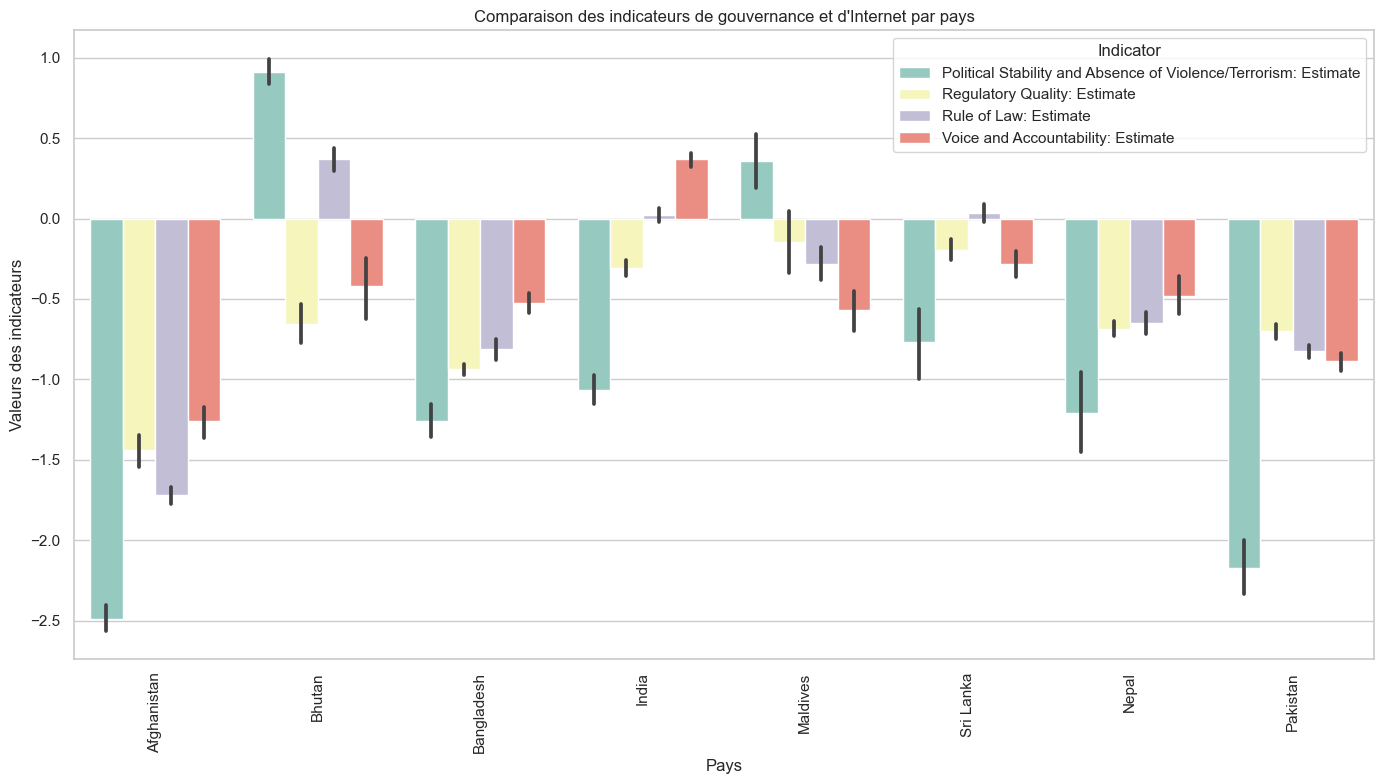

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les données d'intérêt
data_filtered = data[['Country', 
                      'Political Stability and Absence of Violence/Terrorism: Estimate', 
                      'Regulatory Quality: Estimate', 
                      'Rule of Law: Estimate', 
                      'Voice and Accountability: Estimate']].dropna()

# Mise en forme des données pour les graphiques (melt pour transformer en format long)
data_melted = data_filtered.melt(id_vars=['Country'], 
                                 value_vars=['Political Stability and Absence of Violence/Terrorism: Estimate', 
                                             'Regulatory Quality: Estimate', 
                                             'Rule of Law: Estimate', 
                                             'Voice and Accountability: Estimate'],
                                 var_name='Indicator', value_name='Value')

# Créer un graphique en barres pour comparer les indicateurs entre les pays
plt.figure(figsize=(14, 8))
sns.barplot(data=data_melted, x='Country', y='Value', hue='Indicator', palette='Set3')

# Ajouter des titres et des labels
plt.title("Comparaison des indicateurs de gouvernance et d'Internet par pays")
plt.xlabel("Pays")
plt.ylabel("Valeurs des indicateurs")
plt.xticks(rotation=90)  # Pour éviter le chevauchement des pays
plt.tight_layout()

# Afficher le graphique
plt.show()


1. Stabilité politique et absence de violence/terrorisme :

Scores très négatifs : Afghanistan et Pakistan, marqués par des conflits, l'instabilité et le terrorisme.

Score positif : Bhoutan, reflétant une stabilité notable.

Scores légèrement négatifs : Inde, Bangladesh et Maldives, indiquant une instabilité modérée.

2. Qualité de la réglementation :

Scores positifs : Maldives, Bhoutan et, dans une moindre mesure, Inde, témoignant d'une bonne mise en œuvre des politiques publiques.

Scores négatifs : Afghanistan et Pakistan, révélant des réglementations inefficaces ou peu respectées.

3. État de droit :

Respect des lois : Bhoutan, Maldives et Sri Lanka affichent des performances relativement bonnes.

Défis majeurs : Afghanistan, Pakistan et Bangladesh, marqués par la corruption et des institutions faibles.
4. Voix et redevabilité :

Scores négatifs généralisés, sauf une amélioration relative pour le Sri Lanka. Cela traduit un manque de liberté d'expression et de responsabilité des gouvernements.

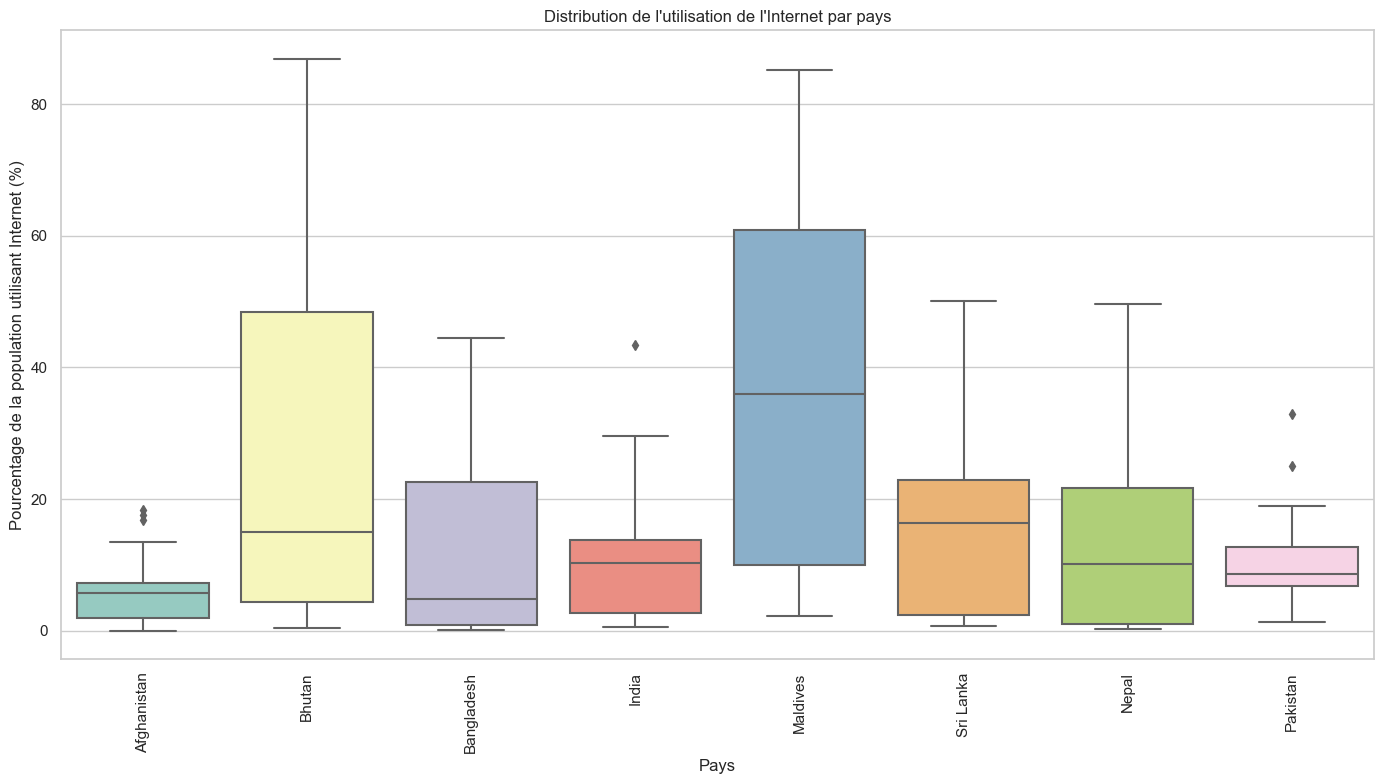

In [30]:
# Créer un box plot pour visualiser la distribution de l'utilisation de l'Internet par pays
# Sélectionner les données pour l'utilisation de l'Internet
data_filtered = data[['Country', 'Individuals using the Internet (% of population)']].dropna()
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_filtered, x='Country', y='Individuals using the Internet (% of population)', palette='Set3')

# Ajouter un titre et des labels
plt.title("Distribution de l'utilisation de l'Internet par pays")
plt.xlabel("Pays")
plt.ylabel("Pourcentage de la population utilisant Internet (%)")
plt.xticks(rotation=90)  # Pour éviter le chevauchement des pays

# Afficher le graphique
plt.tight_layout()
plt.show()


Accès limité : L'utilisation d'Internet est faible dans des pays comme l'Afghanistan, le Pakistan, et le Bangladesh, caractérisés par des médianes basses et une adoption lente.

Progrès modérés : Le Sri Lanka, le Népal, et dans une moindre mesure l'Inde, montrent une adoption progressive d'Internet, bien qu'il reste des disparités.

Accès élevé : Les Maldives et le Bhoutan se distinguent par une utilisation significative d'Internet, avec les Maldives ayant la meilleure couverture globale, malgré des disparités régionales.

# Rapport final : Analyse des conditions de vie par pays (2000-2023)

Sur la base des indicateurs analysés (croissance économique, utilisation d'Internet, stabilité politique, état de droit, accès aux services de base, pollution, couverture forestière, et part d'énergie renouvelable), voici une évaluation des conditions de vie dans les pays étudiés et un classement du meilleur au pire pays pour vivre.

1. Maldives (Meilleur pays à vivre)
Conditions économiques : Forte croissance économique, malgré des fluctuations dues à la pandémie. Forte attractivité pour les IDE.

Utilisation d'Internet : Médiane très élevée, avec un des meilleurs accès dans la région.

Stabilité et gouvernance : Scores positifs pour la stabilité politique et la réglementation. Niveau de corruption modéré.

Services de base : Taux élevé d'accès à l'électricité, à l'eau potable et à l’assainissement.

Pollution et environnement : Pollution très faible (PM2.5), mais dépendance importante aux combustibles fossiles.

Espérance de vie : Élevée (75 ans). Taux de mortalité infantile très faible (5/1 000).

Résumé : Grâce à ses bonnes infrastructures, sa stabilité relative, et son cadre environnemental sain, les Maldives sont le meilleur pays de cette liste pour vivre, malgré leur dépendance aux combustibles fossiles.

2. Bhoutan
Conditions économiques : Croissance régulière et niveaux stables d'inflation. Faibles IDE, mais part élevée d'énergie renouvelable.

Utilisation d'Internet : Proportion significative de la population connectée, malgré quelques disparités régionales.

Stabilité et gouvernance : Meilleur score pour la stabilité politique. Bonne qualité de réglementation et respect des lois.

Services de base : Bon accès à l'électricité et à l'eau potable. Faibles niveaux de pollution PM2.5.

Espérance de vie : Modérée (70 ans). Taux de mortalité infantile bas (30/1 000).

Résumé : Le Bhoutan combine stabilité politique, accès acceptable aux services, et faible pollution, ce qui en fait un choix attrayant, malgré une faible activité économique extérieure.

3. Sri Lanka
Conditions économiques : Croissance modérée, mais des fluctuations marquées depuis 2018. Part significative d'énergie renouvelable.

Utilisation d'Internet : Adoption progressive, avec une couverture modérée.

Stabilité et gouvernance : Relativement stable, avec des scores moyens en matière de réglementation et d’état de droit.

Services de base : Bon accès à l'électricité, à l'eau potable et à l’assainissement.

Pollution et environnement : Pollution modérée. Part notable d'énergie renouvelable.

Espérance de vie : Très élevée (75 ans). Taux de mortalité infantile bas (10/1 000).

Résumé : Sri Lanka offre une bonne qualité de vie, mais l'instabilité récente pourrait poser des défis.

4. Inde
Conditions économiques : Forte croissance et attrait pour les IDE. Réduction continue du chômage et baisse progressive de l'inflation.

Utilisation d'Internet : Adoption en forte progression.

Stabilité et gouvernance : Stabilité modérée, mais des défis liés à la voix et à la redevabilité.

Services de base : Taux d'accès aux services de base en progression.

Pollution et environnement : Pollution PM2.5 très élevée. Couverture forestière importante, mais émissions de CO2 élevées.

Espérance de vie : Modérée (70 ans). Taux de mortalité infantile modéré (30/1 000).

Résumé : L'Inde présente une économie florissante, mais des défis environnementaux et sociaux pourraient nuire à la qualité de vie globale.

5. Népal
Conditions économiques : Croissance stable avec des IDE faibles. Part élevée d'énergie renouvelable.

Utilisation d'Internet : Progression modérée, mais adoption encore limitée.

Stabilité et gouvernance : Gouvernance stable, mais défis liés à la voix et à la redevabilité.

Services de base : Taux d'accès aux services essentiels en progression, mais encore des lacunes.

Pollution et environnement : Pollution PM2.5 élevée, mais une forte part d'énergie renouvelable.

Espérance de vie : Moyenne (65 ans). Taux de mortalité infantile modéré (35/1 000).

Résumé : Le Népal montre un bon équilibre entre durabilité environnementale et progression économique, mais des limitations dans les infrastructures persistent.

6. Bangladesh
Conditions économiques : Croissance régulière, mais IDE fluctuants.

Utilisation d'Internet : Adoption lente et inégale.

Stabilité et gouvernance : Défis importants en matière de réglementation et d’état de droit.

Services de base : Taux d'accès aux services faibles, notamment en matière d’assainissement.

Pollution et environnement : Pollution PM2.5 élevée, émissions de CO2 faibles.

Espérance de vie : Moyenne (70 ans). Taux de mortalité infantile légèrement inférieur à celui du Bhoutan (environ 30/1 000).

Résumé : Bangladesh affiche un développement économique impressionnant, mais des défis sociaux et environnementaux persistent.

7. Pakistan
Conditions économiques : Croissance instable avec des fluctuations significatives. IDE volatils.

Utilisation d'Internet : Adoption lente, avec des inégalités marquées.

Stabilité et gouvernance : Scores négatifs pour la stabilité et l’état de droit. Gouvernance fragile.

Services de base : Faible accès à l’assainissement et à l'électricité.

Pollution et environnement : Pollution PM2.5 élevée, faible part d'énergie renouvelable.

Espérance de vie : Faible (60 ans). Taux de mortalité infantile élevé (70/1 000).

Résumé : Le Pakistan combine une gouvernance faible, des infrastructures limitées et des défis environnementaux, ce qui nuit à la qualité de vie.

8. Afghanistan (Pire pays à vivre)

Conditions économiques : Croissance stagnante, avec des pics de crise. IDE faibles et part modérée d'énergie renouvelable.

Utilisation d'Internet : Couverture minimale, très inégalitaire.

Stabilité et gouvernance : Scores extrêmement faibles pour la stabilité, la réglementation, et l’état de droit.

Services de base : Accès très limité à l'électricité, à l’eau potable, et à l’assainissement.

Pollution et environnement : Pollution PM2.5 modérée, mais des défis liés à la déforestation.

Espérance de vie : Très faible (60 ans). Taux de mortalité infantile élevé (70/1 000).

Résumé : Avec des défis dans presque tous les domaines (stabilité, gouvernance, services, pollution), l'Afghanistan est le pays avec la qualité de vie la plus faible de cette liste.



# Conclusion : Classement global des pays (meilleur au pire):

1-Maldive

2-Bhoutan

3-Sri Lanka

4-Inde

5-Népal

6-Bangladesh

7-Pakistan

8-Afghanistan